In [75]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import fetch_openml

from warnings import filterwarnings
filterwarnings('ignore')

### MNIST

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist.data, mnist.target

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
digit = X[267].reshape(28,28)
digit_label = y[267]

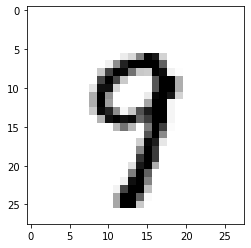

In [8]:
plt.imshow(digit, cmap='binary');

In [9]:
digit_label

'9'

In [10]:
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [11]:
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

### Training a Binary Classifier

In [15]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [14]:
y_train_7

array([False, False, False, ..., False, False, False])

In [23]:
from sklearn.linear_model import SGDClassifier

In [35]:
# the same as linear SVM
sgd_svm_clf = SGDClassifier(loss="hinge", penalty="l2",  max_iter=5, random_state=42)

In [36]:
sgd_svm_clf.fit(X_train, y_train_7)

SGDClassifier(random_state=42)

Prediction:  False
Ground truth:  False


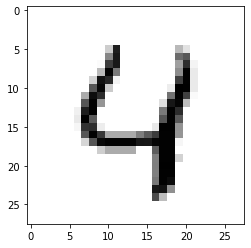

In [37]:
idx = 4
print("Prediction: ", sgd_svm_clf.predict([X_test[idx]])[0])
print("Ground truth: ", y_test_7[idx])
plt.imshow(X_test[idx].reshape(28,28), cmap="binary");

In [38]:
# the same as linear SVM
sgd_log_clf = SGDClassifier(loss="log", penalty="l2",  max_iter=5, random_state=42)

In [39]:
sgd_log_clf.fit(X_trainain, y_train_7)

/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(loss='log', max_iter=5, random_state=42)

Prediction:  False
Ground truth:  False


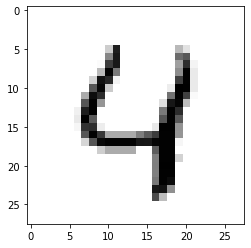

In [40]:
idx = 4
print("Prediction: ", sgd_log_clf.predict([X_test[idx]])[0])
print("Ground truth: ", y_test_7[idx])
plt.imshow(X_test[idx].reshape(28,28), cmap="binary");

## Performance Measures

### Measuring Accuracy Using Cross-Validation

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
cross_val_score(sgd_svm_clf, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.98105, 0.9735 , 0.95335])

In [43]:
cross_val_score(sgd_log_clf, X_train, y_train_7, cv=3, scoring='accuracy')

/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9804, 0.9808, 0.9822])

In [45]:
# check for untrained clfs
sgd_svm_clf_new = SGDClassifier(loss="hinge", penalty="l2",  max_iter=5, random_state=42)
sgd_log_clf_new = SGDClassifier(loss="log", penalty="l2",  max_iter=5, random_state=42)

In [46]:
cross_val_score(sgd_svm_clf_new, X_train, y_train_7, cv=3, scoring='accuracy')

/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9735 , 0.9771 , 0.96525])

In [47]:
cross_val_score(sgd_log_clf_new, X_train, y_train_7, cv=3, scoring='accuracy')

/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/qnarik/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9804, 0.9808, 0.9822])

In [48]:
from sklearn.base import BaseEstimator

In [52]:
class RandClf(BaseEstimator):
    def fit(self, X, y=None):
        return self

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [53]:
randClf = RandClf()

In [56]:
cross_val_score(randClf, X_train, y_train_7, cv=3, scoring='accuracy')

array([0.89535, 0.8984 , 0.893  ])

accuracy is about 0.9, here we have unbalanced dataset that's why we will be right in 9 times out of 10 

### Confusion Matrix

In [57]:
from sklearn.model_selection import cross_val_predict

In [76]:
y_train_pred = cross_val_predict(sgd_log_clf_new, X_train, y_train_7, cv=3)

In [77]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [72]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [61]:
confusion_matrix(y_train_7, y_train_pred)

array([[53290,   445],
       [  687,  5578]], dtype=int64)

In [70]:
# when it claims that the image is '7' it corrects 93% of the time
precision_score(y_train_7, y_train_pred)

0.9261165532126847

In [71]:
# it only detects 89% of all '7'
recall_score(y_train_7, y_train_pred)

0.8903431763766959

In [67]:
accuracy_score(y_train_7, y_train_pred)

0.9811333333333333

In [73]:
f1_score(y_train_7, y_train_pred)

0.9078776041666667

### Precision/Recall Trade-off

In [87]:
y_scores = sgd_log_clf.decision_function([X_train[29]])
y_scores

array([54685.5123857])

In [88]:
y_train_7[29]

True

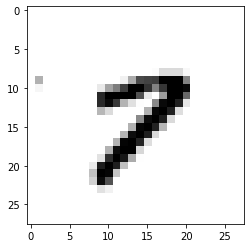

In [91]:
plt.imshow(X_train[29].reshape(28,28), cmap='binary');


In [92]:
threshold = 0


In [94]:
pred_0 = (y_scores > threshold)
pred_0

array([ True])

In [95]:
y_scores = cross_val_predict(sgd_log_clf_new, X_train, y_train_7, cv=3, method="decision_function")

In [97]:
from sklearn.metrics import precision_recall_curve

In [98]:
preciaion_, recall_, thresh_ = precision_recall_curve(y_train_7, y_scores)

#### 1 way to select a good precision/recall trade-off -> precision VS recall via Threshold 

In [100]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid

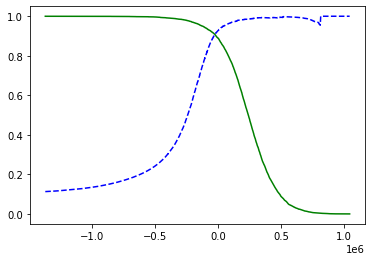

In [102]:
plot_precision_recall_vs_threshold(preciaion_, recall_, thresh_)
plt.show()

#### 2 way to select a good precision/recall trade-off -> precision VS recall curve


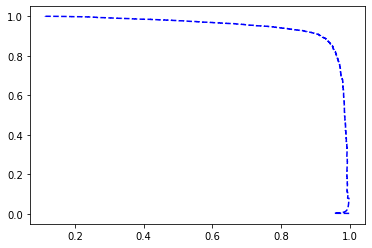

In [105]:
plt.plot(preciaion_[:-1], recall_[:-1], "b--");

###  3 way to select a good precision/recall trade-off -> ROC

In [106]:
from sklearn.metrics import roc_curve

In [107]:
fpr, tpr, thresholds = roc_curve(y_train_7, y_scores)

In [108]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid

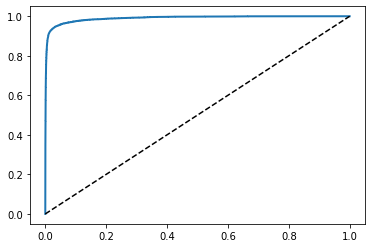

In [109]:
plot_roc_curve(fpr, tpr)
plt.show()

In [110]:
from sklearn.metrics import roc_auc_score

In [112]:
# One way to compare classifiers is to measure the area under the curve (AUC). A perfect
#classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
roc_auc_score(y_train_7, y_scores)

0.9900911860107436

As a rule of thumb, you should prefer the <b>PR curve</b> whenever the <b>positive
class is rare</b> or when you care more about the false positives than
the false negatives. Otherwise, use the ROC curve. For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (7s) compared to the negatives
(non-7s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the top-
left corner).

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
# method="predict_proba" is equivalent to method="decision_function"
forest_clf = RandomForestClassifier(random_state=42)
y_probs_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv=3, method='predict_proba')

In [116]:
y_scores_forest = y_probs_forest[:, 1]
# score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_7, y_scores_forest)

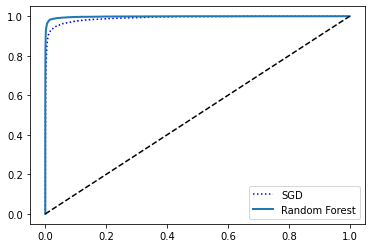

In [117]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [118]:
roc_auc_score(y_train_7, y_scores_forest)

0.998063105789986

## Multiclass Classification

In [119]:
from sklearn.svm import SVC

In [124]:
svm_clf = SVC(random_state=42, max_iter=1)

In [125]:
svm_clf.fit(X_train, y_train)

SVC(max_iter=1, random_state=42)

In [126]:
some_digit = X_train[29]

In [128]:
svm_clf.predict([some_digit])

array([1], dtype=uint8)

In [129]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [130]:
from sklearn.multiclass import OneVsRestClassifier

In [131]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42, max_iter=1))

In [133]:
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(max_iter=1, random_state=42))

In [134]:
ovr_clf.predict([some_digit])

array([7], dtype=uint8)

### Multilabel Classification

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
knn_clf = KNeighborsClassifier()

In [137]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [138]:
knn.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [140]:
some_digit = X_train[0]
y_train[0]

5

In [141]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [ ]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")

### Multioutput Classification

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)

In [ ]:
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)